In [1]:
import pandas as pd
import matplotlib.pyplot as plt  


1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [2]:
ncc_df=pd.read_excel('C:\\Users\\emmal\\Documents\\NSS\\Projects\\advanced-pandas-emmydoore\\data\\Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')

In [3]:
ncc_df=ncc_df.dropna()
ncc_df.head()
ncc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7400 entries, 1 to 19742
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 7400 non-null   object 
 1   Name                   7400 non-null   object 
 2   Burial Month           7400 non-null   object 
 3   Month No.              7400 non-null   float64
 4   Burial Day             7400 non-null   float64
 5   Burial Year            7400 non-null   float64
 6   Sex                    7400 non-null   object 
 7   Race                   7400 non-null   object 
 8   Age                    7400 non-null   float64
 9   Residence              7400 non-null   object 
 10  Cause of Death/Burial  7400 non-null   object 
 11  Ave                    7400 non-null   object 
 12  Section/Lot            7400 non-null   object 
 13  Remarks                7400 non-null   object 
dtypes: float64(4), object(10)
memory usage: 867.2+ KB


2. **Most Common Causes of Death.**  

In [4]:
#   a. Find the 10 most common (known) recorded causes of death.
#note: found that tilde ~ in front of df means NOT  
#https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

#ran: ncc_df['Cause of Death/Burial'].value_counts().head(10) --> Need to fix 'Unknown' 'Not Known'
total_death=ncc_df[~ncc_df['Cause of Death/Burial'].isin(['Unknown','Not Known'])]
total_death['Cause of Death/Burial'].value_counts().head(10)

Cause of Death/Burial
Consumption      995
Old Age          428
Cholera          354
Cholrea          322
Pneumonia        244
Flux             213
Typhoid Fever    193
Dropsy           170
Complicated      162
Cold             156
Name: count, dtype: int64

In [5]:
# b. Clean up some of the misspellings. 
# Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".
total_death=total_death.replace({'Cause of Death/Burial' : {'Cholrea':'Cholera','Still Born':'Stillborn'}})
td_df=total_death['Cause of Death/Burial'].value_counts().head(10)
print(td_df)

Cause of Death/Burial
Consumption      995
Cholera          676
Old Age          428
Pneumonia        244
Flux             213
Typhoid Fever    193
Dropsy           170
Complicated      162
Cold             156
Complication     129
Name: count, dtype: int64


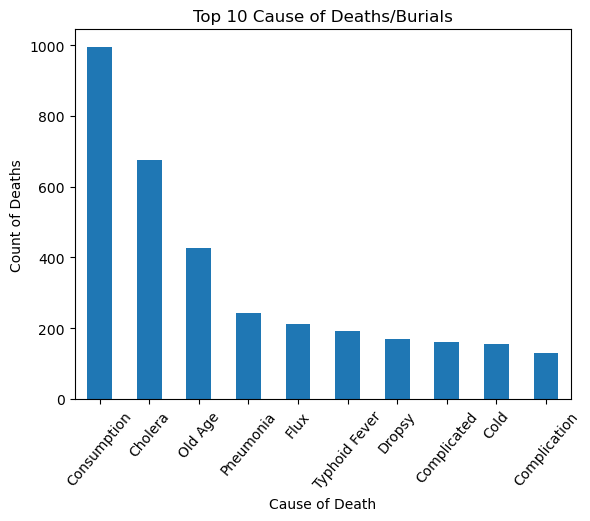

In [6]:
  # c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.
td_df.plot.bar(x='Cause of Death/Burial')
plt.title('Top 10 Cause of Deaths/Burials')
plt.xlabel('Cause of Death')
plt.ylabel('Count of Deaths')
plt.xticks(rotation = 50);

**Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings. 

3. Create a line chart showing the number of burials per year.


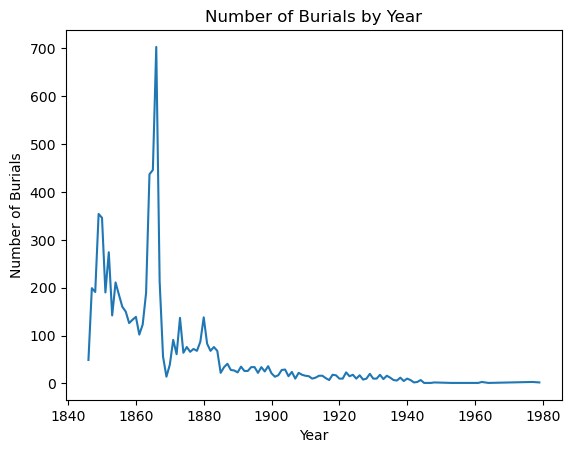

In [7]:
burial_count=ncc_df['Burial Year'].value_counts().sort_index()
burial_count.plot(kind= 'line')
plt.ylabel('Number of Burials')
plt.xlabel('Year')
plt.title('Number of Burials by Year');


4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  
    **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?


In [8]:
#a.
pd.crosstab(ncc_df['Burial Year'],ncc_df['Burial Month'])

Burial Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Burial Year,,,,,,,,,,,,
1846.0,0,0,18,0,0,0,0,0,0,8,10,13
1847.0,13,24,16,11,17,6,20,18,9,22,23,20
1848.0,13,19,7,23,16,28,25,19,21,6,10,4
1849.0,20,11,13,32,13,49,114,42,32,9,8,11
1850.0,12,23,15,12,6,157,47,21,16,17,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1961.0,0,0,0,0,0,0,0,1,0,0,0,0
1962.0,0,0,1,0,0,0,0,1,0,1,0,0
1964.0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
#b.
ncc_df['Burial Year']=ncc_df['Burial Year'].astype(int)
cross=pd.crosstab(ncc_df['Burial Year'],ncc_df['Burial Month'])
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#sort months in order according to months list
cross=cross.reindex(months, axis="columns")
print(cross)


Burial Month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Burial Year                                                             
1846            0    0    0    0    0    0    0    0   13   10    8   18
1847           17   11   18   13    9   20    6   24   20   23   22   16
1848           16   23   19   13   21   25   28   19    4   10    6    7
1849           13   32   42   20   32  114   49   11   11    8    9   13
1850            6   12   21   12   16   47  157   23   11    9   17   15
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1961            0    0    1    0    0    0    0    0    0    0    0    0
1962            0    0    1    0    0    0    0    0    0    0    1    1
1964            0    0    0    0    0    0    0    0    0    0    1    0
1977            0    0    1    0    1    0    0    0    0    0    1    0
1979            0    0    0    0    1    0    0    0    1    0    0    0

[109 rows x 12 columns]


In [10]:
#c.
ncc_copy=ncc_df

#years 1846-1860
ncc_copy=ncc_copy[(ncc_copy['Burial Year'] >=1846) & (ncc_copy['Burial Year']<=1860)]

#new cross tab with filtered burial years

cross_2=pd.crosstab(ncc_copy['Burial Year'],ncc_copy['Burial Month'])
cross_2=cross_2.reindex(months, axis="columns")
print(cross_2)

Burial Month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Burial Year                                                             
1846            0    0    0    0    0    0    0    0   13   10    8   18
1847           17   11   18   13    9   20    6   24   20   23   22   16
1848           16   23   19   13   21   25   28   19    4   10    6    7
1849           13   32   42   20   32  114   49   11   11    8    9   13
1850            6   12   21   12   16   47  157   23   11    9   17   15
1851           12   15   14   13   15   15   27   13   18   23   11   14
1852           17   18   22   14   28   44   39   25   18   12   18   19
1853            9   10   14   13    8   25    4   12   15    8   12   12
1854           14   13    9   21   22   47   25   23    8    9   12    8
1855            4    3    7   18   20   18   28   16   27   15   15   14
1856           10   19   11   15   17   15   21    7   14   13    5   13
1857           11   17   16   10   13   11   15   1

5. **Burials per Decade** 

In [14]:
#a. Create a "Decade" column to show the decade in which a burial occurred.

#makes decade column
ncc_df['Decade']=(ncc_df['Burial Year']//10)*10
ncc_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Decade
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of...",1970
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis,1970
5,6W,"Woolwine, Earl G.",Mar,3.0,16.0,1977,M,W,85.0,"San Marcos, Texas",Old Age,Mulberry,lot 25,west 11- sect..,1970
6,6W,"Wadley, Sarah Vaughn",May,5.0,17.0,1977,F,W,73.0,Texas,Old Age,Elm,lot 17,4-sect..,1970
7,6W,"White, Cora Bell",Nov,11.0,6.0,1977,F,W,93.0,"Houston, Nashville",Old Age,Turnpike,lot 21,"15a , White, William C. lot",1970


In [36]:
#b.Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.


#filters gender
# | = OR
gender=ncc_df[(ncc_df['Sex'] =='M') | (ncc_df['Sex'] == 'F')]

#m/f by decade
g_df=pd.crosstab(gender['Decade'],gender['Sex'])

#making a total column
g_df['Total']=g_df['F']+g_df['M']

#proportion column
g_df["% Female"]=round((g_df['F']/g_df['Total'])*100,2)
g_df["% Male"]=round((g_df['M']/g_df['Total'])*100,2)

g_df.head(14)

Sex,F,M,Total,% Female,% Male
Decade,,,,,
1840,394,396,790,49.87,50.13
1850,949,965,1914,49.58,50.42
1860,1236,1186,2422,51.03,48.97
1870,412,349,761,54.14,45.86
1880,322,263,585,55.04,44.96
1890,162,133,295,54.92,45.08
1900,98,98,196,50.00,50.00
1910,73,65,138,52.90,47.10
1920,77,63,140,55.00,45.00


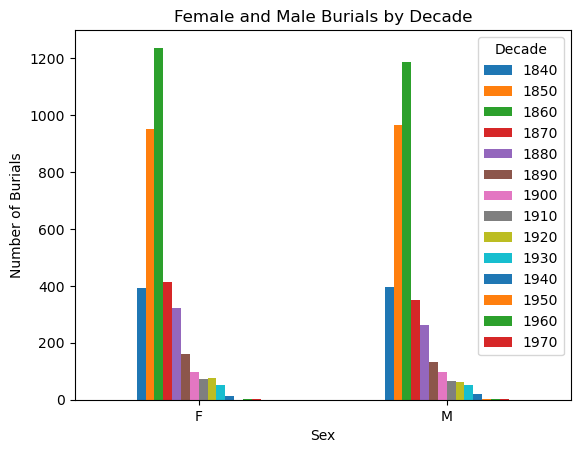

In [49]:
#c.Create a clustered bar chart to show how male and female burials have changed over time.
bar_df=pd.crosstab(gender['Sex'],gender['Decade'])

bar_df.plot(kind='bar')
plt.xticks(rotation=360)
plt.ylabel('Number of Burials')
plt.title('Female and Male Burials by Decade');

### Bonus Questions

6. **Burials per Age Group**  
    a. Add a column to the original dataset to classify each row to one of the following categories (0-18, 19-25, 26-40, 41-64, and 65+). (Hint: One way to do this is using the [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)).  
    b. Create a "Year Group" dividing the records up based on burial year. Use the following groups: Before 1880, 1880-1900, 1901-1920, After 1920.  
    c. Use a grouped bar chart to show how the proportion of burials per age group has changed over time. How would you describe the trends in terms of proportion of burials per age group over time?


7. **Last Names**  
    a. Create a new column titled Last Name. Extract the last name from the Name column by subsetting to all characters to the left of the comma. (Hint: See the pandas [string split function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html). When you do this, make sure to consider cases where the name does not contain a comma.  
    b. What are the most common last names that appear?


8. The Civil War ended in April, 1865, with the last full year of fighting occurring in 1864.    
   a. Create a new DataFrame, burials_1864 by subsetting the full data to the rows for 1864 burials.  
   b. For any rows whose name contains the word "infant" (capitalized or lowercase), replace the "Age" value with 0.   
   c. Create a new column called age_category. If the individual was age 0 put "Infant". If the individual was not an infant but under age 18, put "Child". Everyone aged 18 and above should be listed as "Adult".  
   d.  Find the mean age for each age group.    
   e.  Find the last infant to be buried in 1864. Two ways this could be accomplished are sorting by both the month number and burial day or by creating a date column (for example, by using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and then sorting by this date column.